In [11]:
import numpy as np

In [12]:
alpha = 0.1
global_noisy_rate = 0.5
x = np.random.dirichlet([alpha] * 30)
y = np.random.dirichlet([alpha] * 30)

x = x * global_noisy_rate
y = y * (1 - global_noisy_rate)

print(x / (x + y))

[9.99870059e-01 5.93059307e-03 1.83530114e-06 1.59111228e-01
 9.46420233e-01 2.60779798e-01 9.18117733e-01 2.39595635e-07
 9.98597068e-01 9.99999283e-01 9.99999935e-01 9.99996233e-01
 9.99791187e-01 1.72163821e-03 3.84861329e-01 6.56686887e-01
 3.07214874e-01 1.43944409e-03 9.97787863e-01 9.95949879e-01
 2.36374121e-05 7.51333056e-01 6.01697455e-08 9.99999951e-01
 9.85762494e-01 1.31678395e-03 2.08647615e-16 4.84655079e-02
 1.48058633e-06 9.96979254e-01]


# 实验1: 噪声异构性对FedAvg的影响

In [13]:
import matplotlib.pyplot as plt

In [14]:
def draw_training_plot(filenames, line_names):
    # 读取.log文件，提取数据
    filename = 'record/20240807/client_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log'
    rounds = []
    accuracies = []

    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('Round'):
                parts = line.split()
                round_num = int(parts[1])
                accuracy = float(parts[-1])
                rounds.append(round_num)
                accuracies.append(accuracy)

    # 绘制折线图
    plt.figure(figsize=(10, 6))
    plt.plot(rounds, accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
    plt.title('Test Accuracy over Rounds')
    plt.xlabel('Round')
    plt.ylabel('Test Accuracy')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # 显示图形
    plt.show()

In [15]:
def plot_training_results(file_paths, labels, title = 'Test Accuracy over Rounds'):
    """
    Plot test accuracy over rounds from multiple log files.

    Parameters:
    - file_paths (list): List of file paths to .log files.
    - labels (list): List of labels for each line plot.

    Returns:
    - None
    """
    # 存储所有数据的列表
    all_rounds = []
    all_accuracies = []

    # 逐个处理每个文件
    for file_path in file_paths:
        rounds = []
        accuracies = []

        with open(file_path, 'r') as f:
            for line in f:
                if line.startswith('Round'):
                    parts = line.split()
                    round_num = int(parts[1])
                    accuracy = float(parts[-1])
                    rounds.append(round_num)
                    accuracies.append(accuracy)

        # 将当前文件的数据加入总的数据列表
        all_rounds.append(rounds)
        all_accuracies.append(accuracies)

    # 绘制折线图
    plt.figure(figsize=(10, 6))

    for rounds, accuracies, label in zip(all_rounds, all_accuracies, labels):
        plt.plot(rounds, accuracies, marker='o', linestyle='-', label=label)

    plt.title(title)
    plt.xlabel('Round')
    plt.ylabel('Test Accuracy')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # 显示图形
    plt.show()

下面测试几个数据集用不同加噪声方式，不同异构程度(alpha)画的图
## cifar100

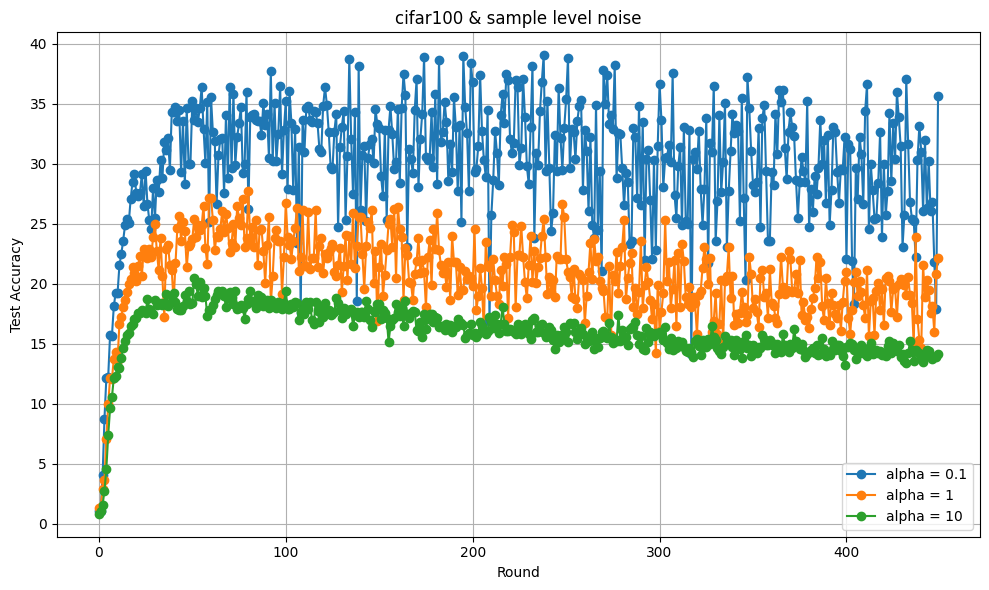

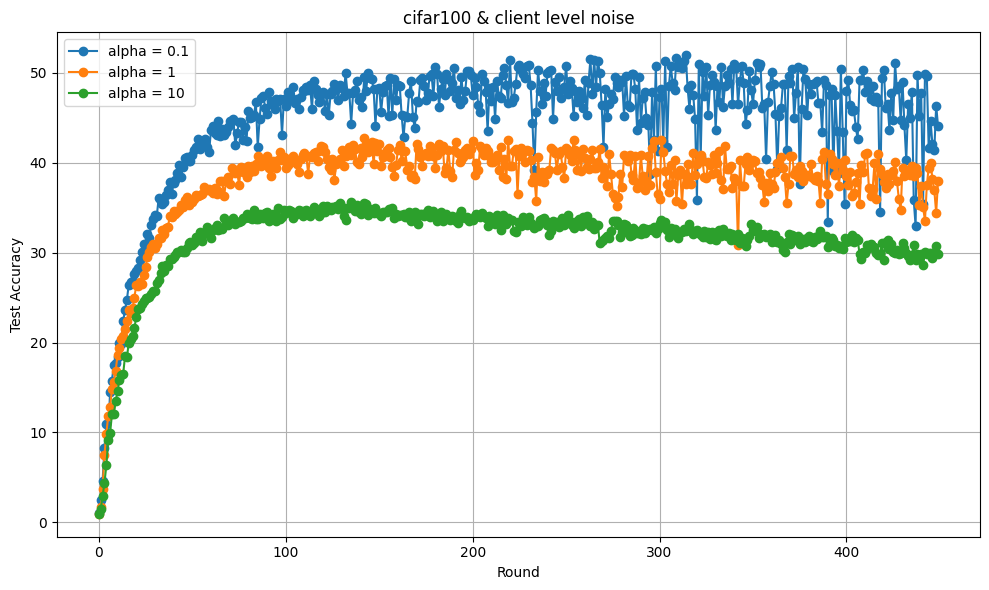

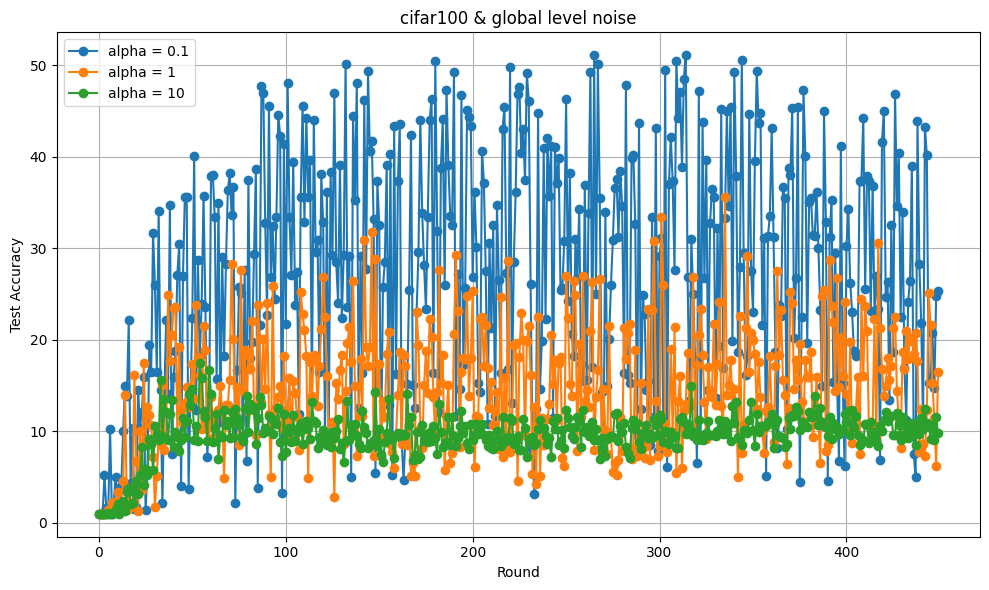

In [16]:

# sample level noise
file_paths = [
    'record/20240807/sample_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240807/sample_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240807/sample_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "cifar100 & sample level noise")
# client level noise
file_paths = [
    'record/20240807/client_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240807/client_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240807/client_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "cifar100 & client level noise")

# global level noise
file_paths = [
    'record/20240807/global_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240807/global_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240807/global_level/cifar100_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "cifar100 & global level noise")

# cifar10

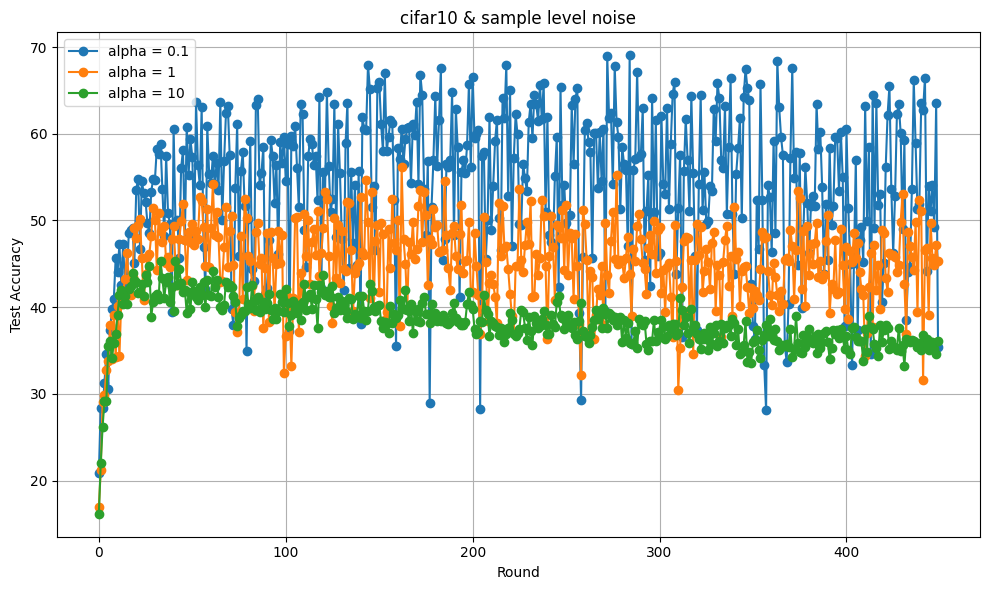

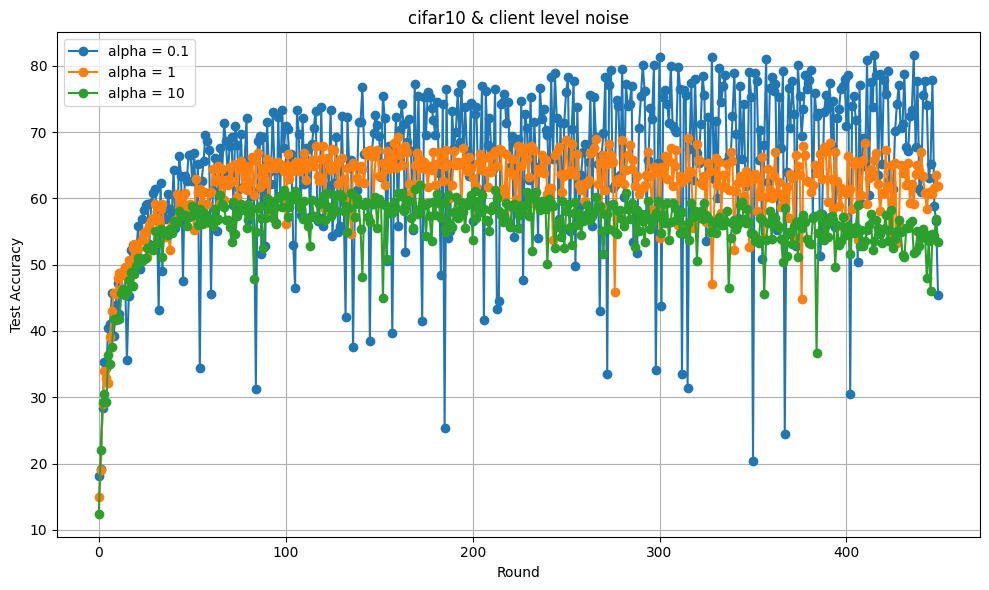

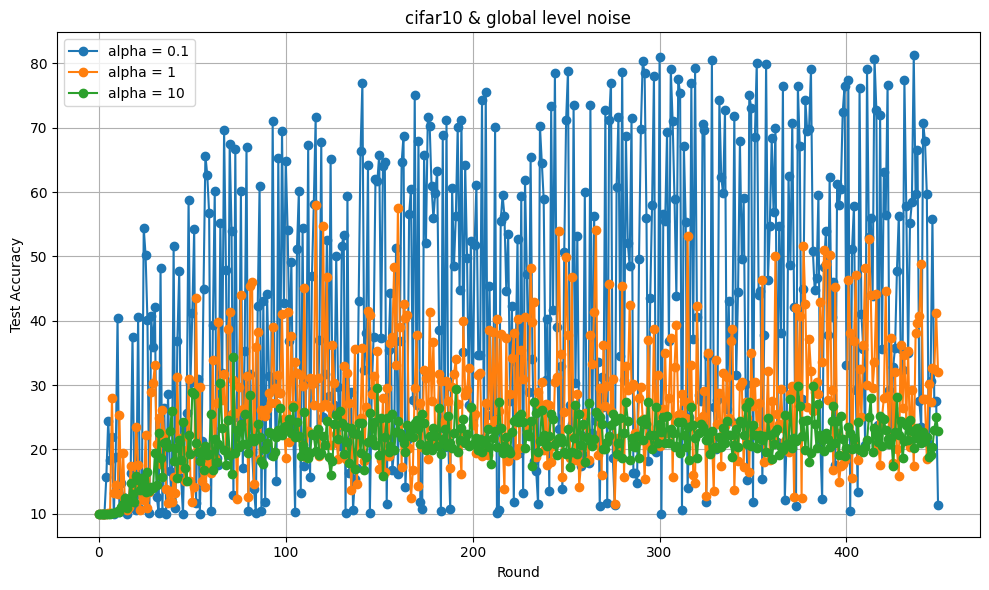

In [17]:
# sample level noise
file_paths = [
    'record/20240808/sample_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240808/sample_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240808/sample_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "cifar10 & sample level noise")

# client level noise
file_paths = [
    'record/20240808/client_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240808/client_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240808/client_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "cifar10 & client level noise")

# global level noise
file_paths = [
    'record/20240808/global_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240808/global_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240808/global_level/cifar10_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "cifar10 & global level noise")

# mnist

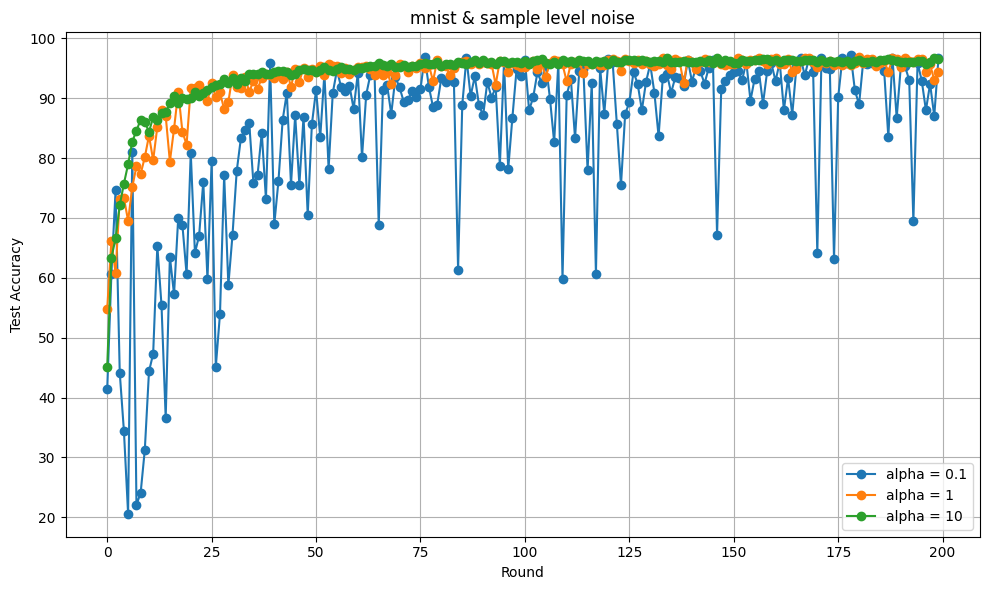

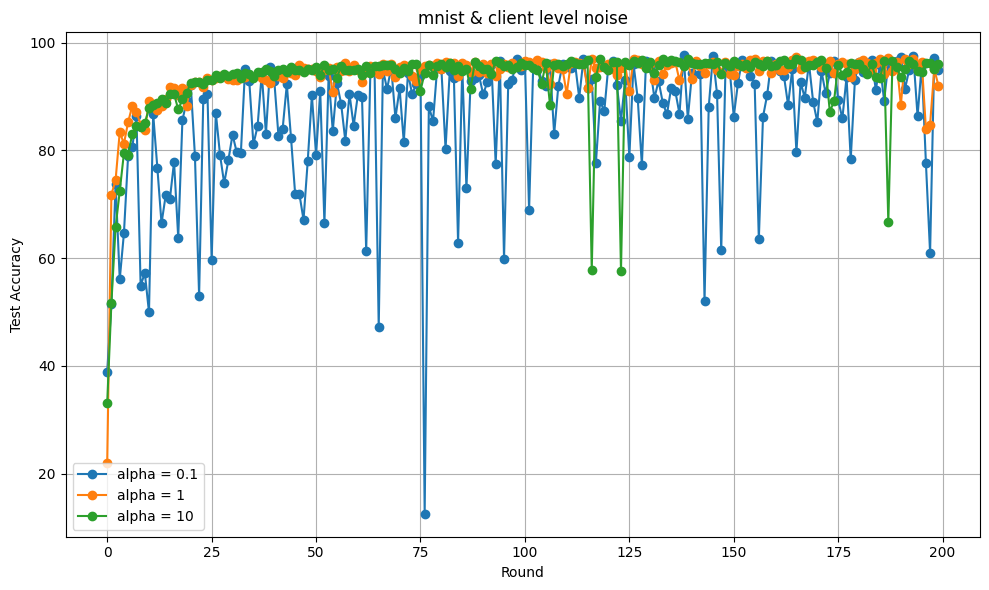

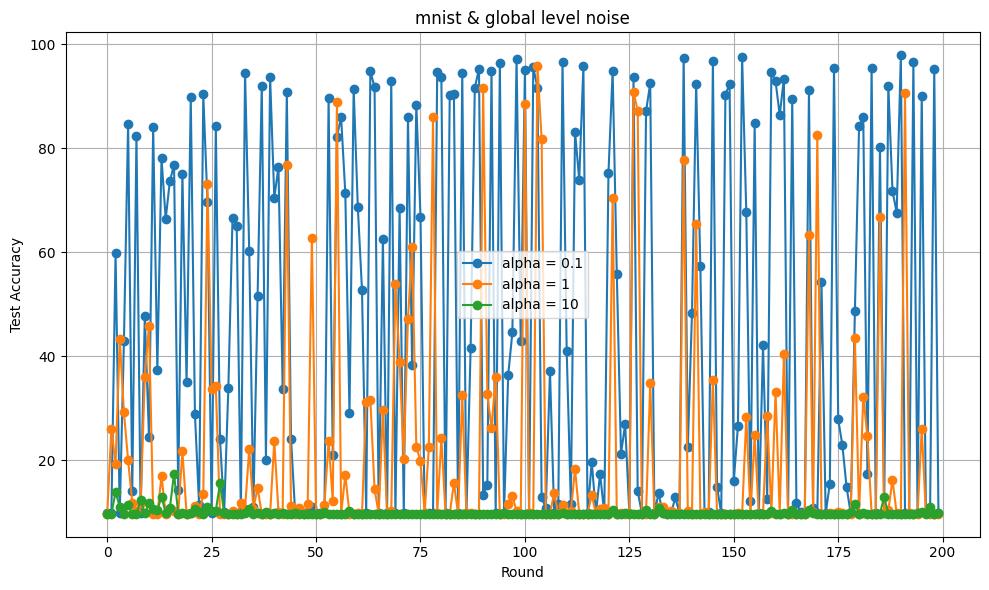

In [18]:
# sample level noise
file_paths = [
    'record/20240808/sample_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240808/sample_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240808/sample_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "mnist & sample level noise")

# client level noise
file_paths = [
    'record/20240808/client_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240808/client_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240808/client_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "mnist & client level noise")

# global level noise
file_paths = [
    'record/20240808/global_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_0.1.log',
    'record/20240808/global_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_1.log',
    'record/20240808/global_level/mnist_FedAVG_IID_averNoise_0.7_noiseAlpha_10.log'
]
labels = [
    'alpha = 0.1',
    'alpha = 1',
    'alpha = 10'

]
plot_training_results(file_paths, labels, "mnist & global level noise")

1. alpha: $\alpha$越小噪声异构越大
2. add noise method: 确定将某个样本设置为噪声时，对这些噪声的随机抽取范围；
   - sample level: 每个噪声样本独立抽取一个类
   - client level: 每个客户端上的噪声样本是某个类
   - global level: 所有噪声样本都设置为某个类
   异构程度大致是 global level  > client level > sample level
# 大致总结的结果
1. 噪声异构程度越大，模型性能越好，但训练过程中波动也越大
   这里猜测性能变化的原因是：从概率上，总体噪声率固定，噪声异构程度大时，抽到噪声的可能性较小
   例如
   0.5  0.5  0.5下，每个客户端上抽一个样本，抽到噪声样本的概率是0.125
   0.9  0.5  0.1下，抽到噪声样本的概率是0.045
2. 用global level且alpha=10加噪时，模型可能整个直接崩掉(最后一张图)
3. 加噪的方式对模型性能的影响大致是: global > sample > client; global可能直接毁掉这个模型，而client level下模型的表现反而比sample level好;
   
   
- 不太理解为什么3中，client level的性能反而比sample level好